# In this example, load the dataset and stimulus

In [2]:
import os
import sys
sys.path.append(os.path.join(os.getcwd(), "..", "code"))

import datetime

# External dependencies
import wavio
import soundsig
import matplotlib.pyplot as plt
import numpy as np
from soundsig.sound import spectrogram, plot_spectrogram

# Modules from this repository
from load_data import load_data, load_stimulus
from plotting import plot_data

In [3]:
df = load_data()

## Example: Plot a stimulus file

In [4]:
wav = load_stimulus(df.iloc[0]["Stimulus File"])
sound_data = wav.data - np.mean(wav.data, axis=0)

In [5]:
t_spec, f_spec, spec, _ = spectrogram(
    sound_data[:, 0],    # Plot the first (and only channel) in stimulus file
    wav.rate,            # Specify the sampling rate
    1000,                # Sampling rate of output spectrogram (1000Hz)
    50                   # Frequency bin size of output spectrogram (50Hz steps)
)

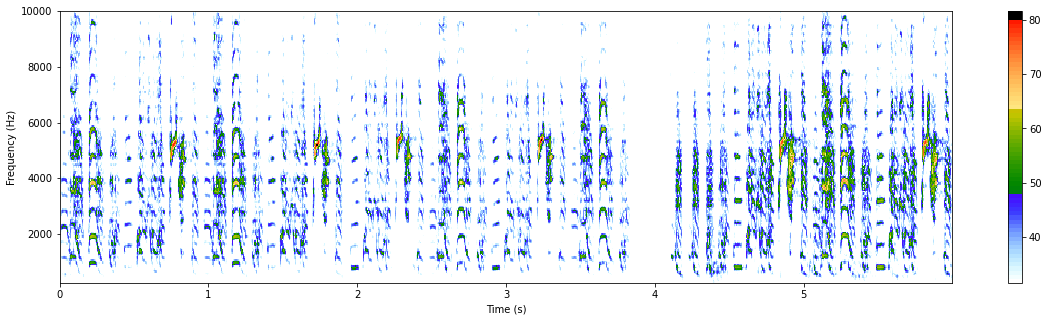

In [6]:
fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
plot_spectrogram(t_spec, f_spec, spec, ax=ax)
plt.ylim(250, 10000)
plt.show()
plt.close(fig)

## Example: Plot the data of a particular subject in a particular date range

### Filter the dataframe down by that subject and list the dates and test context for that subject

In [7]:
subject_df = df[df["Subject"] == "YelRed3010F"]

In [8]:
display(subject_df.head())

,Time,Subject,Trial,Date,RT,Reward,Condition,Interrupt,Stimulus File,Stimulus Vocalizer,Stimulus Call Type,Stimulus Class,Informative Trials Seen,Test Context
90080,2019-06-09 10:08:37.935557,YelRed3010F,0,2019-06-09,NaT,False,None,False,So_Stim_9_LblBla4548_314421.wav,LblBla4548,SO,Nonrewarded,0,SovsSo_1v1
90081,2019-06-09 10:09:01.427599,YelRed3010F,1,2019-06-09,NaT,True,None,False,So_Stim_10_BlaBla0506_061208.wav,BlaBla0506,SO,Rewarded,0,SovsSo_1v1
90082,2019-06-09 10:10:21.305946,YelRed3010F,2,2019-06-09,NaT,False,None,False,So_Stim_6_LblBla4548_363534.wav,LblBla4548,SO,Nonrewarded,1,SovsSo_1v1
90083,2019-06-09 10:10:51.295868,YelRed3010F,3,2019-06-09,NaT,True,None,False,So_Stim_1_BlaBla0506_061215.wav,BlaBla0506,SO,Rewarded,1,SovsSo_1v1
90084,2019-06-09 10:11:20.476042,YelRed3010F,4,2019-06-09,NaT,True,None,False,So_Stim_8_BlaBla0506_150812.wav,BlaBla0506,SO,Rewarded,2,SovsSo_1v1


In [9]:
for (date, test_context), filtered_df in subject_df.groupby(["Date", "Test Context"]):
    print(date, test_context)

2019-06-09 SovsSo_1v1
2019-06-10 SovsSo_4v4
2019-06-11 SovsSo_4v4
2019-06-12 SovsSo_8v8_d1
2019-06-13 SovsSo_8v8_d2
2019-06-14 SovsSo_8v8_d2
2019-06-17 DCvsDC_1v1
2019-06-18 DCvsDC_4v4
2019-06-19 DCvsDC_6v6_d1
2019-06-20 DCvsDC_6v6_d2
2019-06-21 DCvsDC_6v6_d2


In [11]:
chosen_date_range = (datetime.date(2019, 6, 17), datetime.date(2019, 6, 21))

In [12]:
date_df = subject_df[
    (subject_df.Date >= chosen_date_range[0]) &
    (subject_df.Date <= chosen_date_range[1])
]

In [13]:
display(date_df.head())

,Time,Subject,Trial,Date,RT,Reward,Condition,Interrupt,Stimulus File,Stimulus Vocalizer,Stimulus Call Type,Stimulus Class,Informative Trials Seen,Test Context
91817,2019-06-17 07:27:58.033526,YelRed3010F,0,2019-06-17,NaT,True,None,False,DC_Stim_5_BlaLbl8026_352515311802_norm.wav,BlaLbl8026,DC,Rewarded,0,DCvsDC_1v1
91818,2019-06-17 07:28:58.094295,YelRed3010F,1,2019-06-17,NaT,False,None,False,DC_Stim_2_BluRas07dd_250827222810_norm.wav,BluRas07dd,DC,Nonrewarded,0,DCvsDC_1v1
91819,2019-06-17 07:29:47.784238,YelRed3010F,2,2019-06-17,NaT,False,None,False,DC_Stim_9_BluRas07dd_051431250726_norm.wav,BluRas07dd,DC,Nonrewarded,1,DCvsDC_1v1
91820,2019-06-17 07:30:15.900228,YelRed3010F,3,2019-06-17,NaT,False,None,False,DC_Stim_4_BluRas07dd_220805032421_norm.wav,BluRas07dd,DC,Nonrewarded,2,DCvsDC_1v1
91821,2019-06-17 07:32:25.996234,YelRed3010F,4,2019-06-17,NaT,False,None,False,DC_Stim_5_BluRas07dd_141725210728_norm.wav,BluRas07dd,DC,Nonrewarded,3,DCvsDC_1v1


#### Plot separated by specific vocalizers

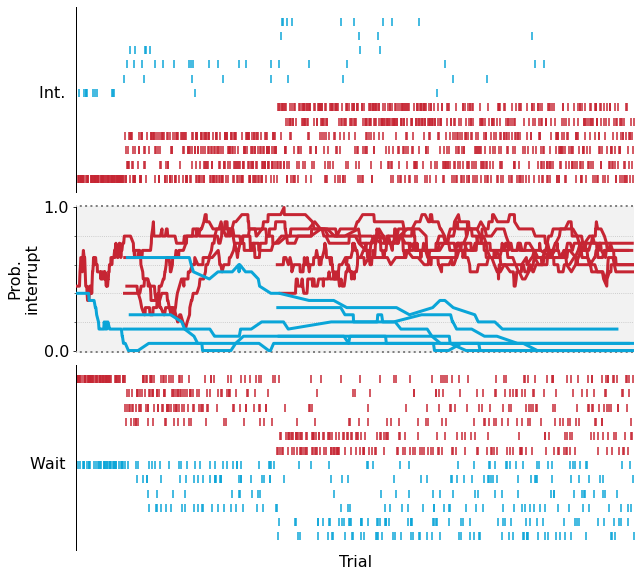

In [14]:
fig = plot_data(
    date_df,
    ["Stimulus Class", "Stimulus Vocalizer", "Stimulus Call Type"]
)
plt.show()
plt.close(fig)

#### Plot just rewarded vs nonrewarded

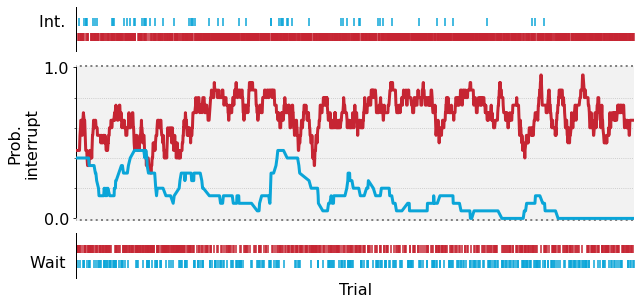

In [15]:
fig = plot_data(
    date_df,
    ["Stimulus Class"]
)
plt.show()
plt.close(fig)